In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Correct the URL to point to the raw CSV data
train = pd.read_csv("https://github.com/satyanarayanan102/Titanic-Machine-learning-from-disaster/blob/main/train.csv")

display(train.head())

print(train.info())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

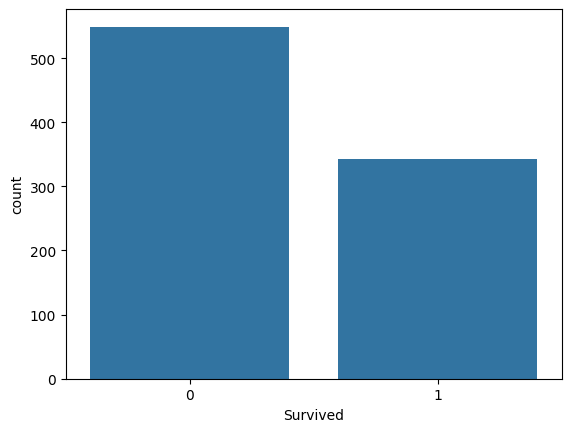

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
# Visualize with a countplot
sns.countplot(x="Survived", data=train)
plt.show()

# Print the proportions
print(train["Survived"].value_counts(normalize=True))

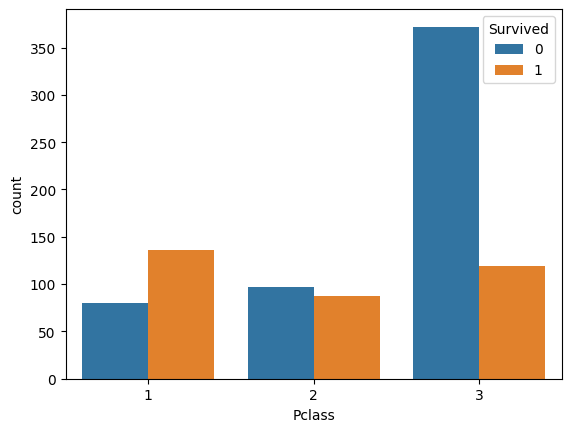

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
# Visualize with a countplot
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

# Proportion of people survived for each class
print(train["Survived"].groupby(train["Pclass"]).mean())

# How many people we have in each class?
print(train["Pclass"].value_counts())

In [ ]:
# Display first five rows of the Name column
display(train[["Name"]].head())

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
# Get titles
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Print title counts
print(train["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


In [ ]:
# Print the Surviving rates by title
print(train["Survived"].groupby(train["Title"]).mean().sort_values(ascending=False))

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


In [ ]:
# Print the missing values in Age column
print(train["Age"].isnull().sum())

177


<ipython-input-21-af257b24c23f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train.Survived==1]["Age"],color="y", bins=7, label="1")
<ipython-input-21-af257b24c23f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train.Survived==0]["Age"], bins=7, label="0")


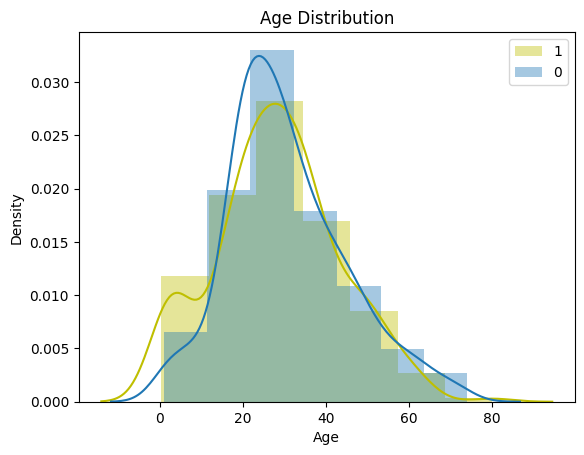

In [ ]:
# Survived by age
sns.distplot(train[train.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(train[train.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

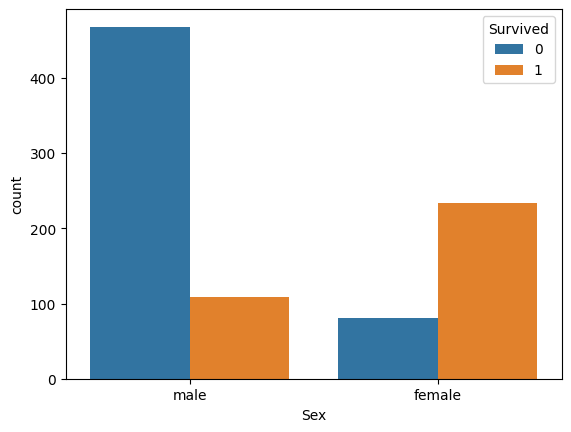

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

# Proportion of people survived for each class
print(train["Survived"].groupby(train["Sex"]).mean())

# How many people we have in each class?
print(train["Sex"].value_counts())

In [ ]:
print(train["SibSp"].value_counts())

print(train["Parch"].value_counts())

train["family_size"] = train["SibSp"] + train["Parch"]

print(train["family_size"].value_counts())

# Proportion of people survived for each class
print(train["Survived"].groupby(train["family_size"]).mean().sort_values(ascending=False))

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64
family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [ ]:
# Print the first five rows of the Ticket column
print(train["Ticket"].head(15))

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object


In [ ]:

# Get first letters of the tickets
train["Ticket_first"] = train["Ticket"].apply(lambda x: str(x)[0])

# Print value counts
print(train["Ticket_first"].value_counts())

# Surviving rates of first letters
print(train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

Ticket_first
3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: count, dtype: int64
Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Fare
(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: count, dtype: int64


<ipython-input-26-e3e2e8558fc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"])


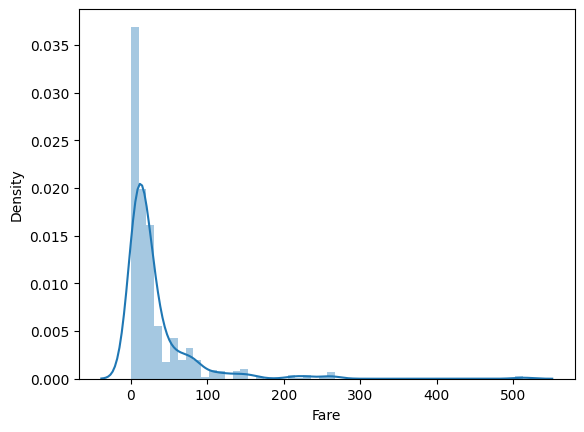

Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]    1.000000
Name: Survived, dtype: float64


<ipython-input-26-e3e2e8558fc7>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train['Survived'].groupby(pd.cut(train['Fare'], 3)).mean())


In [ ]:
# We can plot a histogram to see Fare distribution

# Print 3 bins of Fare column
print(pd.cut(train['Fare'], 3).value_counts())

# Plot the histogram
sns.distplot(train["Fare"])
plt.show()

# Print binned Fares by surviving rate
print(train['Survived'].groupby(pd.cut(train['Fare'], 3)).mean())

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving titanic.png to titanic.png


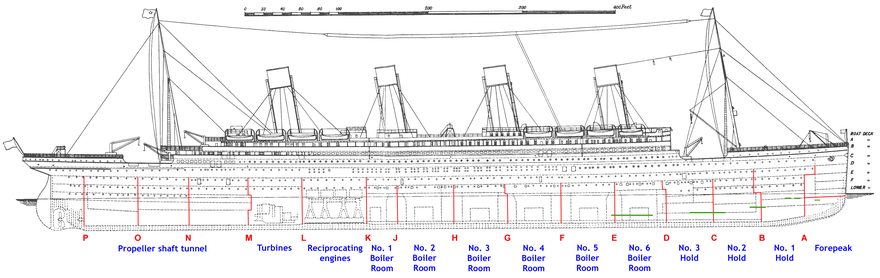

In [ ]:
Image('titanic.png')

In [ ]:
# Print the unique values in the Cabin column
print(train["Cabin"].unique())

# Get the first letters of Cabins
train["Cabin_first"] = train["Cabin"].apply(lambda x: str(x)[0])

# Print value counts of first letters
print(train["Cabin_first"].value_counts())

# Surviving rate of Cabin first letters
print(train.groupby("Cabin_first")["Survived"].mean().sort_values(ascending=False))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Cabin_first
n    687
C     59
B     47
D   

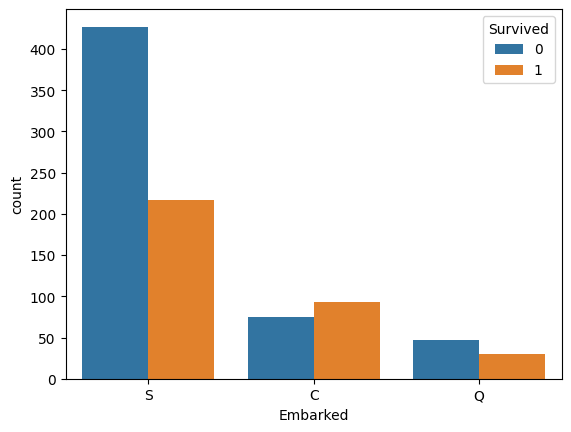

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [ ]:
# Make a countplot
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

# Print the value counts
print(train["Embarked"].value_counts())

# Surviving rates of Embarked
print(train["Survived"].groupby(train["Embarked"]).mean())

In [ ]:
# Load the train and the test datasets
# Updated URLs to point to the raw CSV data
train = pd.read_csv("https://github.com/satyanarayanan102/Titanic-Machine-learning-from-disaster/blob/main/train.csv")
test = pd.read_csv("https://github.com/satyanarayanan102/Titanic-Machine-learning-from-disaster/blob/main/test.csv")

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:
# Put the mean into the missing value
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputers
imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)

# Impute Embarked
train["Embarked"] = imp_embarked.fit_transform(train["Embarked"].values.reshape(-1,1)).ravel() #Use ravel() to flatten the array to 1D
test["Embarked"] = imp_embarked.transform(test["Embarked"].values.reshape(-1,1)).ravel() #Use ravel() to flatten the array to 1D

# Impute Age
train["Age"] = np.round(imp_age.fit_transform(train[["Age"]]))
test["Age"] = np.round(imp_age.transform(test[["Age"]]))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a Label Encoder
le = LabelEncoder()

# Encode Sex
train["Sex"] = le.fit_transform(train[["Sex"]].values.ravel())
test["Sex"] = le.fit_transform(test[["Sex"]].values.ravel())

# Family Size
train["Fsize"] = train["SibSp"] + train["Parch"]
test["Fsize"] = test["SibSp"] + test["Parch"]

# Ticket first letters
train["Ticket"] = train["Ticket"].apply(lambda x: str(x)[0])
test["Ticket"] = test["Ticket"].apply(lambda x: str(x)[0])

# Cabin first letters
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[0])
test["Cabin"] = test["Cabin"].apply(lambda x: str(x)[0])

In [ ]:
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test["Title"] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [ ]:
# Group the family_size column
def assign_passenger_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"

# Group the Ticket column
def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"

# Group the Title column
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"

# Group the Cabin column
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

In [ ]:
# Family size
train["Fsize"] = train["Fsize"].apply(assign_passenger_label)
test["Fsize"] = test["Fsize"].apply(assign_passenger_label)

# Ticket
train["Ticket"] = train["Ticket"].apply(assign_label_ticket)
test["Ticket"] = test["Ticket"].apply(assign_label_ticket)

# Title
train["Title"] = train["Title"].apply(assign_label_title)
test["Title"] = test["Title"].apply(assign_label_title)

# Cabin
train["Cabin"] = train["Cabin"].apply(assign_label_cabin)
test["Cabin"] = test["Cabin"].apply(assign_label_cabin)

In [ ]:
train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin","Title", "Fsize"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin", "Title", "Fsize"], data=test, drop_first=True)

In [ ]:
target = train["Survived"]
train.drop(["Survived", "SibSp", "Parch", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Name","PassengerId"], axis=1, inplace=True)

In [ ]:
display(train.head())
display(test.head())

print(train.info())
print(test.info())

,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,22.0,7.2500,False,True,False,True,True,False,True,False,True,False,False,True
1,0,38.0,71.2833,False,False,False,False,False,False,False,False,False,False,False,True
2,0,26.0,7.9250,False,True,False,True,False,True,True,False,False,False,False,False
3,0,35.0,53.1000,False,False,False,True,False,False,False,False,False,False,False,True
4,1,35.0,8.0500,False,True,False,True,True,False,True,False,True,False,False,False


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,34.0,7.8292,False,True,True,False,True,False,True,False,True,False,False,False
1,0,47.0,7.0000,False,True,False,True,True,False,True,False,False,False,False,True
2,1,62.0,9.6875,True,False,True,False,False,True,True,False,True,False,False,False
3,1,27.0,8.6625,False,True,False,True,True,False,True,False,True,False,False,False
4,0,22.0,12.2875,False,True,False,True,True,False,True,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   891 non-null    int64  
 1   Age                   891 non-null    float64
 2   Fare                  891 non-null    float64
 3   Pclass_2              891 non-null    bool   
 4   Pclass_3              891 non-null    bool   
 5   Embarked_Q            891 non-null    bool   
 6   Embarked_S            891 non-null    bool   
 7   Ticket_Ticket_low     891 non-null    bool   
 8   Ticket_Ticket_middle  891 non-null    bool   
 9   Cabin_Cabin_low       891 non-null    bool   
 10  Cabin_Cabin_middle    891 non-null    bool   
 11  Title_Title_low       891 non-null    bool   
 12  Title_Title_middle    891 non-null    bool   
 13  Fsize_Big_family      891 non-null    bool   
 14  Fsize_Small_family    891 non-null    bool   
dtypes: bool(12), float64(2)

In [ ]:
from sklearn.model_selection import train_test_split

# Select the features and the target
X = train.values
y = target.values

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

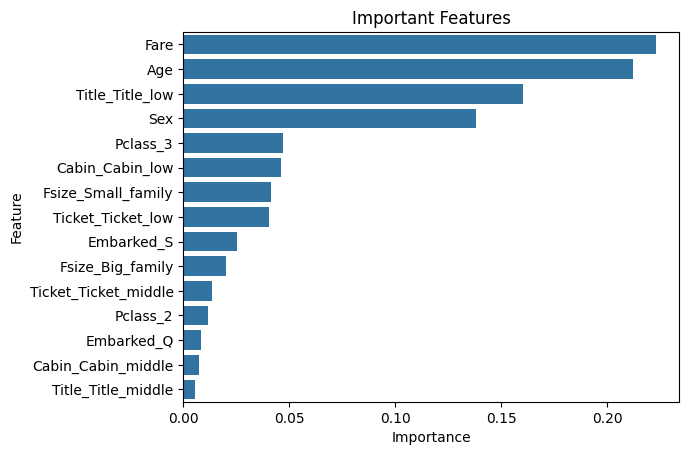

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train and target variables are defined from previous code

# Select the features and the target
X = train.values
y = target.values

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Instantiate and train the model (replace with your actual model parameters if needed)
rf_best = RandomForestClassifier(random_state=42)
rf_best.fit(X_train, y_train)

# Create a pandas series with feature importances
importance = pd.Series(rf_best.feature_importances_,index=train.columns).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
# Add labels to your graph
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Important Features")
plt.show()

In [ ]:
# Store passenger ids
# Use the 'raw' URL to access the CSV file directly
ids = pd.read_csv("https://raw.githubusercontent.com/Vignesh106121/Titanic-Machine-Learning-from-Disaster-/main/test.csv")[["PassengerId"]].values

# Make predictions
# Assuming rf_best is your fitted model from the previous code block
predictions = rf_best.predict(test.values)

# Print the predictions
print(predictions)

# Create a dictionary with passenger ids and predictions
df = {'PassengerId': ids.ravel(), 'Survived':predictions}

# Create a DataFrame named submission
submission = pd.DataFrame(df)

# Display the first five rows of submission
display(submission.head())

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 1]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
